In [10]:
import joblib
import clean_predict
import pandas as pd
import numpy as np
from wordcloud import WordCloud


In [11]:
model = joblib.load('D:\FinalProject\DataBase\Output\model')
bow = joblib.load(r'D:\FinalProject\DataBase\Output\Output For Modelling\bow')

In [12]:
raiku_review = pd.read_csv(r'D:\FinalProject\DataBase\Input\Raiku_NightCream_Review.csv')

In [13]:
produk = 'Raikku Night Cream'

In [14]:
def word_frequency(text):
    wordList = text.split()
    # generate frequencey of word to dictionary 
    wordFreq = {word : wordList.count(word) for word in wordList}
    return wordFreq

def wordcloud_freq(word_freq,title,figure_size = (10,5)):
    wordcloud.generate_from_frequencies(word_freq)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

In [15]:
raiku_review[raiku_review['Review'].isna()].index

Int64Index([], dtype='int64')

In [16]:
raiku_review.drop(raiku_review[raiku_review['Review'].isna()].index, inplace=True)

In [17]:
raiku_review['clean'] = raiku_review['Review'].apply(clean_predict)

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('count', CountVectorizer(vocabulary=bow)),
                 ('tfid', TfidfTransformer())]).fit(raiku_review['clean'])

In [19]:
x = pipe.transform(raiku_review['clean']).toarray()

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
x = pca.fit_transform(x)

In [21]:
raiku_review = pd.DataFrame({'review': raiku_review['Review'],
'clean': raiku_review['clean'],
'sentiment': model.predict(x)})

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hasil 1 - Predict count

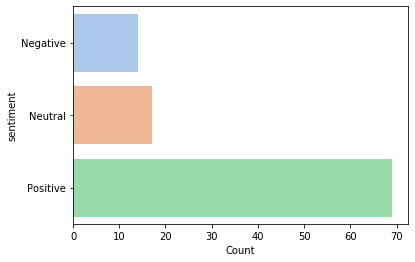


Percentage of Negative Review: 14.0
Percentage of Neutral Review: 17.0
Percentage of Positive Review: 69.0


In [23]:
sns.countplot(y = raiku_review['sentiment'], palette = 'pastel') 
plt.yticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.xlabel('Count')
plt.show()

pos = raiku_review['sentiment'].value_counts().loc[1]/len(raiku_review['sentiment'])*100
neu = raiku_review['sentiment'].value_counts().loc[0]/len(raiku_review['sentiment'])*100
neg = raiku_review['sentiment'].value_counts().loc[-1]/len(raiku_review['sentiment'])*100

print(f'\nPercentage of Negative Review: {round(neg, 2)}')
print(f'Percentage of Neutral Review: {round(neu, 2)}')
print(f'Percentage of Positive Review: {round(pos, 2)}')

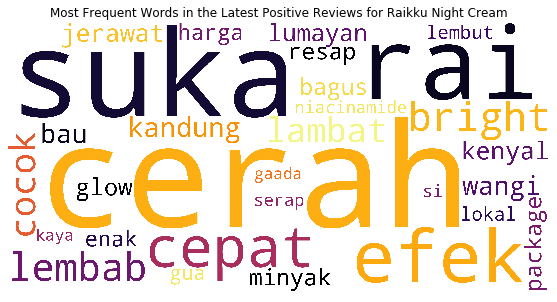

In [24]:
review_pos = " ".join(raiku_review[raiku_review['sentiment'] == 1]['clean'].dropna())
review_pos = word_frequency(review_pos)
zipping = list(zip(review_pos.values(), review_pos.keys()))
zipping.sort()
review_pos = {}
for values, keys in zipping[-30:]:
    review_pos[keys] = values
wordcloud = WordCloud(width = 5000,
                     height = 2500,
                     colormap ='inferno',
                     background_color='white')
wordcloud_freq(review_pos, f'Most Frequent Words in the Latest Positive Reviews for {produk}')

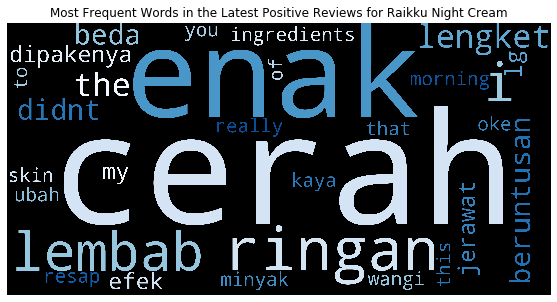

In [22]:
review_neg = " ".join(raiku_review[raiku_review['sentiment'] == -1]['clean'].dropna())
review_neg = word_frequency(review_neg)
zipping = list(zip(review_neg.values(), review_neg.keys()))
zipping.sort()
review_neg = {}
for values, keys in zipping[-30:]:
    review_neg[keys] = values
wordcloud = WordCloud(width = 5000,
                     height = 2500,
                     colormap ='Blues',
                     background_color='black')
wordcloud_freq(review_neg, f'Most Frequent Words in the Latest Positive Reviews for {produk}')

In [23]:
raiku_review.to_excel('D:\Review.xlsx', index = False)

In [64]:
a = model.predict(x)